<a href="https://colab.research.google.com/github/ahaque12/fiddler-matching-socks/blob/main/Fiddler_on_the_proof_Matching_socks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fiddler on the Proof - Matching Socks
https://thefiddler.substack.com/p/can-you-find-a-matching-pair-of-socks


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy

Use `sympy` to take performance advantage of simplifying/canceling out division of factorials.

In [ ]:
from sympy import ff, symbols, diff, solve_rational_inequalities, reduce_inequalities
from sympy.solvers import solve

def proba(m, n):
    """ Probability of picking the first matching pair from m pairs
    on the nth selection.
    """
    if not (m +1 > n ):
        raise ValueError("m+1 must be greater than n")

    # Calculate the falling factorial (n-1)_m
    # falling_factorial = sp.falling_factorial(n-1, m)

    # Calculate the expression
    result = (2**(n-1) * ff(m,n-1 ) * (n-1))/ ff(2*m, n)

    return result

proba(5, 4)

2/7

# Attempt solving analytically.

In [ ]:
m, n = symbols('m n')
h_mn = (2**(n-1) * ff(m,n-1 ) * (n-1))/ ff(2*m, n)
h_mn

2**(n - 1)*(n - 1)*FallingFactorial(m, n - 1)/FallingFactorial(2*m, n)

In [ ]:
diff(h_mn, n)

2**(n - 1)*(n - 1)*log(2)*FallingFactorial(m, n - 1)/FallingFactorial(2*m, n) - 2**(n - 1)*(n - 1)*FallingFactorial(m, n - 1)*Derivative(FallingFactorial(2*m, n), n)/FallingFactorial(2*m, n)**2 + 2**(n - 1)*(n - 1)*Subs(Derivative(FallingFactorial(m, _xi_2), _xi_2), _xi_2, n - 1)/FallingFactorial(2*m, n) + 2**(n - 1)*FallingFactorial(m, n - 1)/FallingFactorial(2*m, n)

In [ ]:
# Not implemented error
# solve(diff(h_mn, n), n)

In [ ]:
h_mn_p1 = (2**(n) * ff(m,n ) * (n))/ ff(2*m, n+1)
h_mn_m1 = (2**(n-2) * ff(m,n-2 ) * (n-2))/ ff(2*m, n-1)

# Find where h_mn_p1 - h_mn < 0 and h_mn - h_mn_m1 > 0, error
# reduce_inequalities([h_mn_p1 - h_mn < 0, h_mn - h_mn_m1 > 0], n)

```html
  .-""-.
 /      \
|  O  O  |
|   /\   |
 \      /
  `----`


# Fit appropriate functional form

In [ ]:
%%timeit
proba(5, 4)

6.47 µs ± 434 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%%timeit
(3*(2**3)*np.math.factorial(5)/np.math.factorial(2))/(np.math.factorial(10)/np.math.factorial(5))

<magic-timeit>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`


11.3 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
proba(5000, 10)

4637809004544/5167067076146951

In [ ]:
def max_pick(m, start=2):
  """ Pick value with highest probability of picking the first matching pair
  from m pairs. Starts iteration at start value. Stops when value starts dropping
  because function is concave.
  """
  p0=0
  p1=1
  for i in range(start, m+1):
    p1 = proba(m,i)

    if p1 < p0:
      return (i-1, p0)
    p0 = p1
  return m, p1

max_pick(5)

(4, 2/7)

In [ ]:
def max_pick_n(m):
  """ Pick value with highest probability of picking the first matching pair
  from m pairs. Iterates over every value from 2 to m.
  """
  p0=0
  p1=0
  n = 2
  for i in range(2, m+1):
    p1 = proba(m,i)

    if p1 > p0:
      n = i
      p0 = p1

  return n, p0

max_pick_n(5)

(4, 2/7)

In [ ]:
# Confirm both methods give you the same result for large m.
max_pick(1000), max_pick_n(1000)

((46,
  50116022943651257634768142297911550157623060655505408/3612415014142091231204939081218367398515725341593178207),
 (46,
  50116022943651257634768142297911550157623060655505408/3612415014142091231204939081218367398515725341593178207))

In [ ]:
r, _ = max_pick(10000)
r, r / 10000

(142, 0.0142)

In [ ]:
r, _ = max_pick(100000)
r, r / 100000

(448, 0.00448)

In [ ]:
from tqdm import tqdm

p=2
picks = []
x = np.arange(10,1000000,1000)
# x = np.array([2**i for i in range(3,20)])

for i in tqdm(x):
    # Use prior max to start iteration for next number. This is because
    # the max monotonically increases with m.
    p, _ = max_pick(i, start=p)
    picks.append(p)

picks = np.array(picks)

100%|██████████| 1000/1000 [01:00<00:00, 16.50it/s]


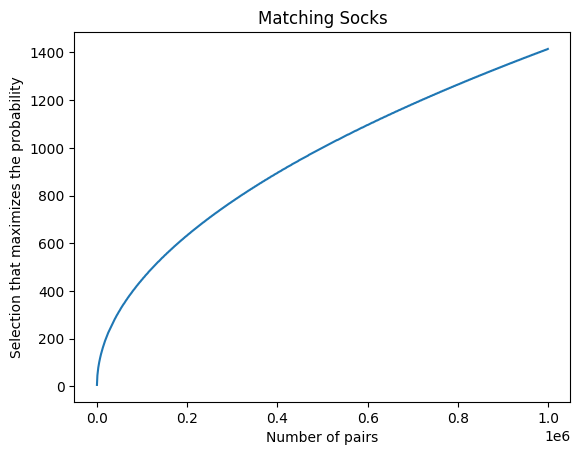

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, picks)
ax.set_xlabel("Number of pairs")
ax.set_ylabel("Selection that maximizes the probability")
ax.set_title("Matching Socks");

In [ ]:
# Fit a logarithmic function from x to picks
from scipy.optimize import curve_fit

def log_func(x, a, b):
    return a * np.log(x) + b

popt, _ = curve_fit(log_func, x, picks)
popt

array([  296.73559918, -2857.60068921])

In [ ]:
# Fit a second degree polynomial from x to picks
from scipy.optimize import curve_fit

def poly_func(x, a, b, c):
    return a * x**2 + b * x + c

popt_2d, _ = curve_fit(poly_func, x, picks)
popt_2d

array([-8.12423714e-10,  1.94439679e-03,  2.42285302e+02])

In [ ]:
# Fit a power function from x to picks
from scipy.optimize import curve_fit

def power_func(x, a, b):
    return a * x**b

popt_power, _ = curve_fit(power_func, x[-100:], picks[-100:])
popt_power

array([1.41941188, 0.49978666])

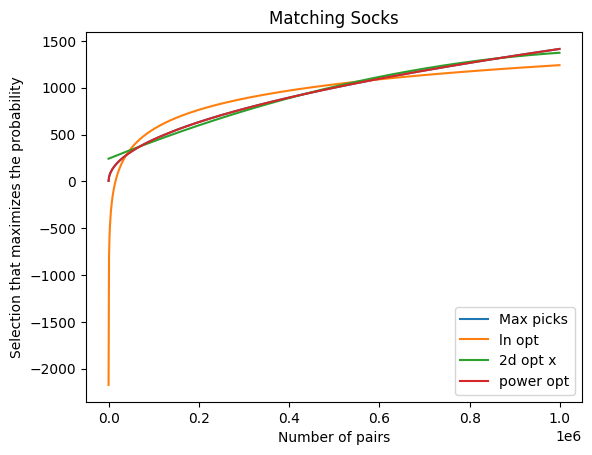

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, picks, label="Max picks")
ax.plot(x, popt[0]*np.log(x)+popt[1], label="ln opt")
ax.plot(x, popt_2d[0]*x**2 + popt_2d[1]*x + popt_2d[2], label="2d opt x")
ax.plot(x, popt_power[0]*x**popt_power[1], label="power opt")
ax.set_xlabel("Number of pairs")
ax.set_ylabel("Selection that maximizes the probability")
ax.set_title("Matching Socks")
ax.legend();

The optimal function is $\sqrt2N^{\frac12} + 1$ where $N$ is the number of matching pairs.

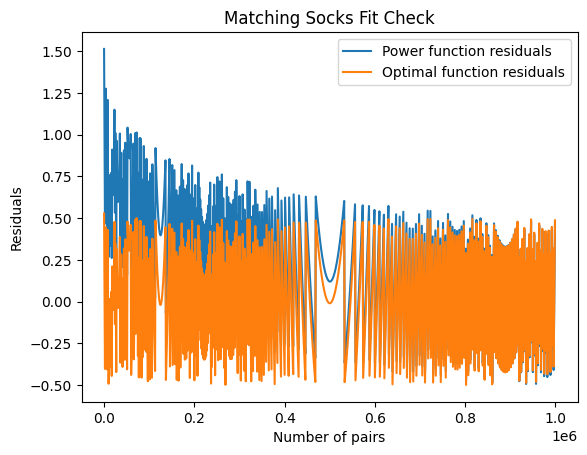

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, (picks - popt_power[0]*x**popt_power[1]), label="Power function residuals")
ax.plot(x, (picks - np.sqrt(2)*x**.5 -1), label="Optimal function residuals")
ax.set_xlabel("Number of pairs")
ax.set_ylabel("Residuals")
ax.set_title("Matching Socks Fit Check")
ax.legend();

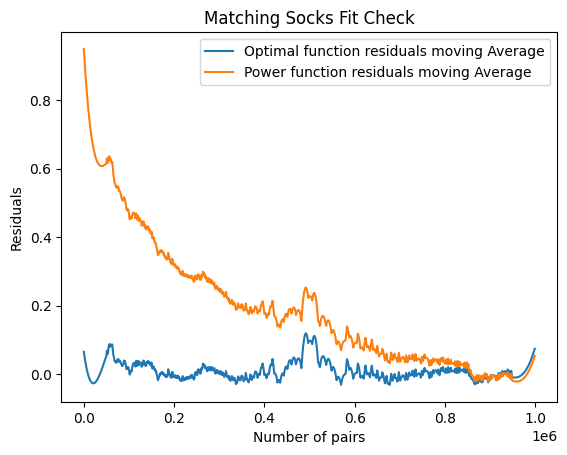

In [ ]:
# Plot moving average  of residuals of the optimal function
from scipy.signal import savgol_filter

fig, ax = plt.subplots()
ax.plot(x, savgol_filter(picks - np.sqrt(2)*x**.5 -1, 101, 3), label="Optimal function residuals moving Average")
ax.plot(x, savgol_filter(picks - popt_power[0]*x**popt_power[1], 101, 3), label="Power function residuals moving Average")
ax.set_xlabel("Number of pairs")
ax.set_ylabel("Residuals")
ax.set_title("Matching Socks Fit Check")
ax.legend();

In [ ]:
val = 100000
max_pick(val)[0], power_func(val, *popt_power), np.sqrt(2)*val**.5+1

(448, 447.7563362866978, 448.213595499958)

In [ ]:
val = x[-1]*2
val, max_pick(val, picks[-1])[0], power_func(val, *popt_power), np.sqrt(2)*val**.5+1

(1998020, 2000, 2000.1574647565872, 2000.0097548536378)